# Introduction

Our input is the resulting dataset from the Exploratory Data Analysis and the Feature Engineering performed on any original datasets. <br/>

## Imports

In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

In [46]:
# File system manangement
import os
import gc

In [4]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# prepare data
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
# models and metrics
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_auc_score (auc(fpr, tpr) from roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict

In [6]:
# LightGBMError: Do not support special JSON characters in feature name
import re

In [7]:
# hyperopt
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval

In [8]:
# timing
from timeit import default_timer as timer

In [9]:
# persistant search for hyperopt
import threading as th
import keyboard

In [10]:
# pickle
import pickle

In [11]:
# custom functions
from ipynb.fs.full.functions import heatmap, missing_values_table, convert_types
from ipynb.fs.full.functions import split_show_results, show_results

2:80: E501 line too long (80 > 79 characters)


In [12]:
''' warning show results to debug in functions (plot_roc_curve issue)'''

' warning show results to debug in functions (plot_roc_curve issue)'

In [12]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# paramètres
# to display any columns
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
sns.set(style="ticks")
sns.set_style('whitegrid')

## Read in Data

In [14]:
# List files available
print(os.listdir('Data/'))

['aggregated.csv', 'any_app.pkl', 'application.pkl', 'application_miss.pkl', 'application_test.csv', 'application_train.csv', 'application_trunc.csv', 'backup_full_aggregated.csv', 'backup_opti_aggregated.csv', 'boruta_ranking.csv', 'boruta_ranking.pkl', 'boruta_support.pkl', 'bureau.csv', 'bureau.pkl', 'bureau_balance.csv', 'credit_card_balance.csv', 'desc.pkl', 'Descriptions.xlsx', 'final.csv', 'full_aggregated.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'opti_aggregated.csv', 'POS_CASH_balance.csv', 'previous.pkl', 'previous_application.csv', 'sample_submission.csv', 'sel_app.pkl', 'target.pkl', '~$Descriptions.xlsx']


In [15]:
# load target (for correlation & Boruta study)
with open("Data/sel_app.pkl", mode="rb") as df:
    any_application = pickle.load(df)

In [16]:
print(any_application.shape)
any_application.head(1)

(356251, 273)


,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,N_CNT_PREV_REJECTED_SCOFR,N_FLAG_REJECTED,N_PREV_LAST_REJECTION,N_ADJ_REJECT_INDEX,N_PREV_LAST_APPLICATION,N_REJECT_RATE,N_CNT_BUR_LOANS,N_BUR_LAST_APPLICATION,YEARS_BIRTH,N_DAYS_EMPLOYED_RATIO,N_CREDIT_INCOME_RATIO,N_ANNUITY_INCOME_RATIO,N_CREDIT_TERM,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Pensioner,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MAX,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_SUM,BUR_AMT_CREDIT_SUM_MAX,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR,BUR_CREDIT_ACTIVE_Active_MEAN,BUR_CREDIT_ACTIVE_Closed_MEAN,BUR_CREDIT_TYPE_Cash loans_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_N_APP_CREDIT_RATIO_MIN,PREV_N_APP_CREDIT_RATIO_MAX,PREV_N_APP_CREDIT_RATIO_MEAN,PREV_N_ADJ_CREDIT_RATIO_MIN,PREV_N_ADJ_CREDIT_RATIO_MAX,PREV_N_ADJ_CREDIT_RATIO_MEAN,PREV_N_ADJ_INTEREST_EVAL_MIN,PREV_N_ADJ_INTEREST_EVAL_MAX,PREV_N_ADJ_INTEREST_EVAL_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_VAR,PREV_NC_LOAN_TERM_SUM,PREV_NC_LOAN_TERM_VAR,PREV_NC_LOAN_AGE_MAX,PREV_NC_LOAN_AGE_MEAN,PREV_NC_LOAN_AGE_SUM,PREV_NC_LOAN_AGE_VAR,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_CODE_REJECT_REASON_REJECTED_HC_MEAN,PREV_CODE_REJECT_REASON_REJECTED_SCOFR_MEAN,PREV_CODE_REJECT_REASON_REJECTED_XAP_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_N_CONTRACT_STATUS_APPROVED_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_HC_MEAN,PREV_N_CONTRACT_STATUS_REJ

! we've lost a few rows ! there is an 'index' column, useless

# Data preparation

### Get back train - test from "Any applications"

In [17]:
# keep training applications only
train = any_application[any_application['TARGET'].notna()]
test = any_application[any_application['TARGET'].isna()]

In [18]:
print('Training set full shape: ', train.shape)
print('Testing set full shape: ', test.shape)

Training set full shape:  (307507, 273)
Testing set full shape:  (48744, 273)


In [19]:
train.head(1)

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,N_CNT_PREV_REJECTED_SCOFR,N_FLAG_REJECTED,N_PREV_LAST_REJECTION,N_ADJ_REJECT_INDEX,N_PREV_LAST_APPLICATION,N_REJECT_RATE,N_CNT_BUR_LOANS,N_BUR_LAST_APPLICATION,YEARS_BIRTH,N_DAYS_EMPLOYED_RATIO,N_CREDIT_INCOME_RATIO,N_ANNUITY_INCOME_RATIO,N_CREDIT_TERM,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Pensioner,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MAX,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_SUM,BUR_AMT_CREDIT_SUM_MAX,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR,BUR_CREDIT_ACTIVE_Active_MEAN,BUR_CREDIT_ACTIVE_Closed_MEAN,BUR_CREDIT_TYPE_Cash loans_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_N_APP_CREDIT_RATIO_MIN,PREV_N_APP_CREDIT_RATIO_MAX,PREV_N_APP_CREDIT_RATIO_MEAN,PREV_N_ADJ_CREDIT_RATIO_MIN,PREV_N_ADJ_CREDIT_RATIO_MAX,PREV_N_ADJ_CREDIT_RATIO_MEAN,PREV_N_ADJ_INTEREST_EVAL_MIN,PREV_N_ADJ_INTEREST_EVAL_MAX,PREV_N_ADJ_INTEREST_EVAL_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_VAR,PREV_NC_LOAN_TERM_SUM,PREV_NC_LOAN_TERM_VAR,PREV_NC_LOAN_AGE_MAX,PREV_NC_LOAN_AGE_MEAN,PREV_NC_LOAN_AGE_SUM,PREV_NC_LOAN_AGE_VAR,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_CODE_REJECT_REASON_REJECTED_HC_MEAN,PREV_CODE_REJECT_REASON_REJECTED_SCOFR_MEAN,PREV_CODE_REJECT_REASON_REJECTED_XAP_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_N_CONTRACT_STATUS_APPROVED_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_HC_MEAN,PREV_N_CONTRACT_STATUS_REJ

In [20]:
# set index with SK_ID_CURR
train = train.set_index('SK_ID_CURR')
test = test.set_index('SK_ID_CURR')

### Data integrity

Missing values affect classifier performance and ability to remedy class imbalance (i.e. ability to build consistent synthetic data in case of SMOTE use to upsample minority class), we have to track the features with many missing value, decide if we should keep them and find the best imputation strategy.

In [21]:
# check for missing values
missing_values = missing_values_table(train)

Your selected dataframe has 272 columns.
There are 246 columns that have missing values.


<AxesSubplot:>

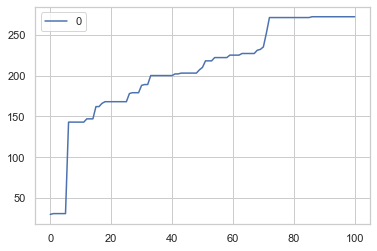

4:80: E501 line too long (103 > 79 characters)


In [22]:
# get the missing curve
missing_list = []
for i in np.arange(0, 101, 1):
    missing = train.shape[1] - len(list(missing_values.index[missing_values['% of Total Values'] > i]))
    missing_list.append(missing)
pd.DataFrame(missing_list).plot()

In [23]:
len(list(missing_values.index[missing_values['% of Total Values'] > 90]))

0

## Train, Test split

SK_ID_CURR is now he index and we build a separated target y_ df from the training data X_. <br/>
Note that we have to build it in a DataFrame format (in order to extract a sample after the train-test split.

In [26]:
def my_split(data=train,
             split_size=0.2,
             impute_strategy='constant',
             scale_strategy=False):
    '''function that split data into train and test according to split_size (test)
    and impute missing values according to the impute strategy
    and MinMaxScale features'''
    # drop the target from the training data
    if 'TARGET' in data:
        X_ = data.drop(columns=['TARGET'])
    else:
        X_ = data.copy()
    y_ = data['TARGET']
    # to keep df format : store columns & index
    columns = X_.columns
    index = X_.index
    # imputation of missing values
    imputer = SimpleImputer(
        missing_values=np.nan,
        strategy=impute_strategy,
        fill_value=0)
    imputer.fit(X_)
    X_ = pd.DataFrame(
        imputer.fit_transform(X_),
        columns=columns,
        index=index)
    # Scale if True, each feature to 0-1
    if scale_strategy is True:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(X_)
        X_ = pd.DataFrame(
            scaler.fit_transform(X_),
            columns=columns,
            index=index)
    # Split data into train and test set (stratify by target)
    X_train, X_test, y_train, y_test = train_test_split(
        X_,
        y_,
        stratify=y_,
        test_size=split_size,
        random_state=42)
    print('Training data shape: ', X_train.shape)
    print('Testing data shape: ', X_test.shape)
    print('Labels train data shape: ', y_train.shape)
    print('Labels test data shape: ', y_test.shape)
    return X_train, X_test, y_train, y_test, columns

In [27]:
X_train, X_test, y_train, y_test, features = my_split()

Training data shape:  (246005, 271)
Testing data shape:  (61502, 271)
Labels train data shape:  (246005,)
Labels test data shape:  (61502,)


### Sampling - class balance

Cf. below, SMOTE test versus class_weight='balanced'.

Introduce and test a downsampling method?

### Sampling - model selection process

! we need to work with proper df types

In [159]:
# randomly sample the data an apply to target
X_train_sample = X_train.sample(n=1000, random_state=42)
# Get the indexes to sample target_vector
sample_index = X_train_sample.index
mask = (y_train.index.isin(sample_index))
y_train_sample = y_train[mask]
# print results
len(y_train_sample)

1000

In [160]:
X_train_re_sample = X_train_sample.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

1:80: E501 line too long (92 > 79 characters)


In [161]:
# control failure rate of sample
print('global failure rate: ',
     round(100 * y_train_sample.value_counts()[1] / (y_train_sample.value_counts()[1] + y_train_sample.value_counts()[0]), 2))

global failure rate:  7.4


3:6: E128 continuation line under-indented for visual indent
3:80: E501 line too long (126 > 79 characters)


In [162]:
X_opt = X_train_re_sample
y_opt = y_train_sample

# Model evaluation

## Metric: Area Under Roc & "Damage Scoring"

First off all, accuracy (Σ True positive or negative / Σ Total) is __not a relevant metric__ in our case, mainly due to the __class imbalance__, with over than 90% accuracy if we predict the majority class only, granting loan to anyone and facing any risky clients failures.
The area under the ROC curve offers a more valuable metric, that can be trusted for models comparison. A model that simply guesses at random will have an ROC AUC of 0.5. Any improvement of AUC score, up to ideal 1, means the model gets to a minimal False positive rate and a maximal True positive rate.
In our case, we'll even discuss the opportunity of building our own score, based on an detailed interpretation of the confusion matrix (see [F-score](https://en.wikipedia.org/wiki/F-score)) to more accurately define what could be the "best" retuls, in terms of the financial opportunity or damages for the company. This lead to build a compromise between approval of risky clients and rejection og good ones. <br/>
After studying the resulting populated confusion matrix, we decided to use Fbeta to value the relative importance of recall over precision (with an illustrative value of beta=7), which is a good approach to value the financial damage of granting a loan to a failure-risky client than rejecting a loan to a "good" client.

## Classifiers evaluation techniques

1. first run and compare 

2. K-Fold cross validation technique

3. Hyperopt? We choose to work with the 5.2k stars lib [hyperopt](https://github.com/hyperopt/hyperopt) to find the most relevant model.

## Classifiers rough training

Let's create a model_run function that will instanciate any classifier and get results.

In [28]:
def model_run(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=None
):

    model.fit(X_train[cols], y_train)
    y_pred = model.predict(X_test[cols])
    y_pred_proba = model.predict_proba(X_test[cols])[:, 1]

    f7 = fbeta_score(y_test, y_pred, beta=7)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)

    print(model)
    print('AUC score: ', round(auc_score, 4))
    print('Fbeta score (7): ', round(f7, 4))

    return fpr, tpr, auc_score, f7

In [29]:
def model_run_with_imp(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=None
):
    model.fit(X_train[cols], y_train)
    y_pred = model.predict(X_test[cols])
    y_pred_proba = model.predict_proba(X_test[cols])[:, 1]
    f7 = fbeta_score(y_test, y_pred, beta=7)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    print(model)
    print('AUC score: ', round(auc_score, 4))
    print('Fbeta score (7): ', round(f7, 4))
    # create df
    feature_importances = model.feature_importances_
    df = {
        'feature_names': sel_features,
        'feature_importances': feature_importances
    }
    df = pd.DataFrame(df).sort_values(by='feature_importances',
                                      ascending=False)
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align='center', edgecolor='k')
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    # Plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    return fpr, tpr, auc_score, f7

### Naive Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5.

In [30]:
naive = GaussianNB()
fpr_naive, tpr_naive, auc_score_naive, f7_naive = model_run(
    naive,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=X_train.columns
)

GaussianNB()
AUC score:  0.5442
Fbeta score (7):  0.7882


### Logistic Regression

In [32]:
logreg = LogisticRegression()
fpr_logreg, tpr_logreg, auc_score_logreg, f7_logreg = model_run(
    logreg,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=X_train.columns
)

LogisticRegression()
AUC score:  0.5606
Fbeta score (7):  0.0004


### Random Forest

In [34]:
rndfor = RandomForestClassifier()
fpr_rndfor, tpr_rndfor, auc_score_rndfor, f7_rndfor = model_run(
    rndfor,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=X_train.columns
)

RandomForestClassifier()
AUC score:  0.6927
Fbeta score (7):  0.0039


### LightGBM

In [35]:
# features format
X_train_re = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test_re = X_test.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

In [36]:
liggbm = LGBMClassifier()
fpr_liggbm, tpr_liggbm, auc_score_liggbm, f7_liggbm = model_run(
    liggbm,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

LGBMClassifier()
AUC score:  0.7594
Fbeta score (7):  0.0201


### Collect results

In [37]:
# Collect results
classifier_names = [
    'Gaussian Naive Bayes',
    'Logistic Regression',
    'Random Forest',
    'LightGBM']
auc_scores = [
    auc_score_naive,
    auc_score_logreg,
    auc_score_rndfor,
    auc_score_liggbm]
f7_scores = [
    f7_naive,
    f7_logreg,
    f7_rndfor,
    f7_liggbm]

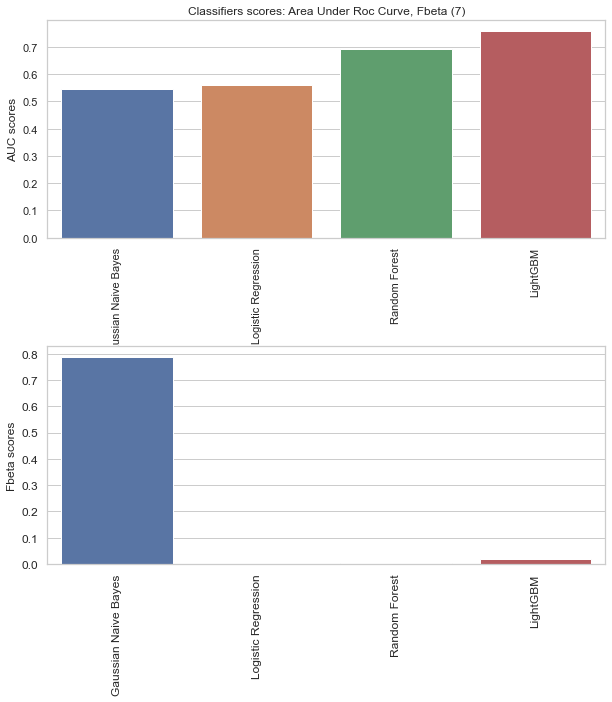

In [38]:
# display results
sns.set_color_codes("colorblind")
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Classifiers scores: Area Under Roc Curve, Fbeta (7)')
s1 = sns.barplot(x=classifier_names, y=auc_scores)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.ylabel('AUC scores', fontsize=12)
plt.subplot(212)
s2 = sns.barplot(x=classifier_names, y=f7_scores)
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
plt.ylabel('Fbeta scores', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0, 0.5, 'True Positive Rate')

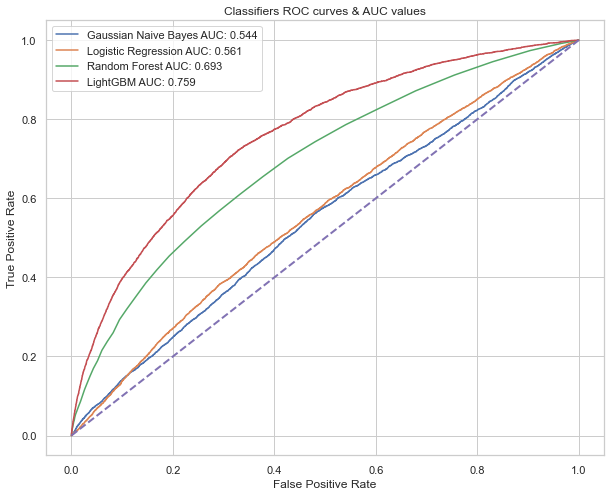

In [39]:
# display roc curves
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(
    fpr_naive,
    tpr_naive,
    label=str(classifier_names[0])
    + ' AUC: '
    + str(round(auc_score_naive, 3)))
ax.plot(
    fpr_logreg,
    tpr_logreg,
    label=str(classifier_names[1])
    + ' AUC: '
    + str(round(auc_score_logreg, 3)))
ax.plot(
    fpr_rndfor,
    tpr_rndfor,
    label=str(classifier_names[2])
    + ' AUC: '
    + str(round(auc_score_rndfor, 3)))
ax.plot(
    fpr_liggbm,
    tpr_liggbm,
    label=str(classifier_names[3])
    + ' AUC: '
    + str(round(auc_score_liggbm, 3)))
ax.plot([0, 1], [0, 1], linewidth=2, linestyle='--')
plt.legend(loc="best")
plt.title("Classifiers ROC curves & AUC values")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Cross Validation optimization (case of LightGBM)

In [57]:
def model_classify(model_in, dtrain_X, dtrain_Y, dtest_X, dtest_Y, n_folds=5):
    """Train and test a model using cross validation.
    """
    # Extract the ids
    # train_ids = dtrain_X.index
    test_ids = dtest_X.index
    print('Training Data Shape: ', dtrain_X.shape)
    print('Testing Data Shape: ', dtest_X.shape)
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    # Convert to np arrays
    features = np.array(dtrain_X)
    test_features = np.array(dtest_X)
    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    # Empty array for test predictions
    predictions = np.zeros(test_features.shape[0])
    predictions_class = np.zeros(test_features.shape[0])
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    # print model
    print(model_in)
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        # Training data for the fold
        train_features, train_labels = features[train_indices], dtrain_Y.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], dtrain_Y.iloc[valid_indices]
        model = model_in
        # Train the model
        model.fit(train_features,
                  train_labels,
                  eval_metric='auc',
                  eval_set=[(valid_features, valid_labels),
                            (train_features, train_labels)],
                  eval_names=['valid', 'train'],
                  early_stopping_rounds=100, verbose=200)
        # Record the best iteration
        best_iteration = model.best_iteration_
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        # Make predictions
        predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:, 1] / k_fold.n_splits
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
    # Make the predictions dataframe
    test_predictions = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': predictions})
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    # Overall validation score
    valid_auc = roc_auc_score(dtrain_Y, out_of_fold)
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    # Dataframe of validation scores
    fold_scores = pd.DataFrame({'fold': fold_names,
                                'train': train_scores,
                                'valid': valid_scores}) 
    predictions_proba = model.predict(test_features, num_iteration=best_iteration)
    predictions_class = model.predict_proba(test_features, num_iteration=best_iteration)
    with open("cv_opt/predictions_proba", mode="wb") as f:
        pickle.dump(predictions_proba, f)
    with open("cv_opt/predictions_class", mode="wb") as f:
        pickle.dump(predictions_proba, f)
    fpr, tpr, thresholds   = roc_curve(dtest_Y, predictions)
    auc_roc = auc(fpr,tpr)
    f1_sc = f1_score(dtest_Y, predictions_class)
    f7 = fbeta_score(dtest_Y, predictions_class, beta=7)
    accuracy = accuracy_score(dtest_Y, predictions_class)
    classify_metrics = classification_report(dtest_Y, predictions_class)
    print(model)
    return feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, f7, auc_roc, fpr, tpr 

31:80: E501 line too long (92 > 79 characters)
33:80: E501 line too long (92 > 79 characters)
46:80: E501 line too long (81 > 79 characters)
48:80: E501 line too long (111 > 79 characters)
50:80: E501 line too long (108 > 79 characters)
61:5: F841 local variable 'test_predictions' is assigned to but never used
61:80: E501 line too long (84 > 79 characters)
63:80: E501 line too long (107 > 79 characters)
75:56: W291 trailing whitespace
76:80: E501 line too long (82 > 79 characters)
77:25: E221 multiple spaces before operator
78:22: E231 missing whitespace after ','
84:80: E501 line too long (101 > 79 characters)
84:102: W291 trailing whitespace


In [58]:
model = LGBMClassifier(n_estimators=10000,
                       objective='binary',
                       class_weight='balanced',
                       learning_rate=0.05,
                       reg_alpha=0.1,
                       reg_lambda=0.1,
                       subsample=0.8,
                       n_jobs=-1,
                       random_state=42)

feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, f7, auc_score, fpr, tpr  = model_classify(
    model,
    X_train_re,
    y_train,
    X_test_re,
    y_test)

print('Baseline metrics')
print(fold_scores)

Training Data Shape:  (246005, 271)
Testing Data Shape:  (61502, 271)
LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.822923	train's binary_logloss: 0.52941	valid's auc: 0.752589	valid's binary_logloss: 0.551603
[400]	train's auc: 0.866577	train's binary_logloss: 0.484065	valid's auc: 0.752643	valid's binary_logloss: 0.522561
Early stopping, best iteration is:
[330]	train's auc: 0.853358	train's binary_logloss: 0.498344	valid's auc: 0.75332	valid's binary_logloss: 0.531581
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.820952	train's binary_logloss: 0.531839	valid's auc: 0.759846	valid's binary_logloss: 0.553274
[400]	train's auc: 0.864304	train's binary_logloss: 0.486598	valid's auc: 0.760761	valid's binary_logloss: 0.524026


11:80: E501 line too long (111 > 79 characters)
11:93: E221 multiple spaces before operator


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)
Baseline metrics
      fold     train     valid
0        0  0.853358  0.753320
1        1  0.856841  0.761128
2        2  0.842981  0.760706
3        3  0.831881  0.762943
4        4  0.847261  0.752444
5  overall  0.846464  0.758005


Accuracy score :  0.7294234333842802
F1 score :  0.28156974485170316
Fbeta-7 score :  0.6235587017129219
AUC :  0.7649332297446009
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.83     56537
         1.0       0.18      0.66      0.28      4965

    accuracy                           0.73     61502
   macro avg       0.57      0.70      0.56     61502
weighted avg       0.90      0.73      0.79     61502



Text(0, 0.5, 'True Positive Rate')

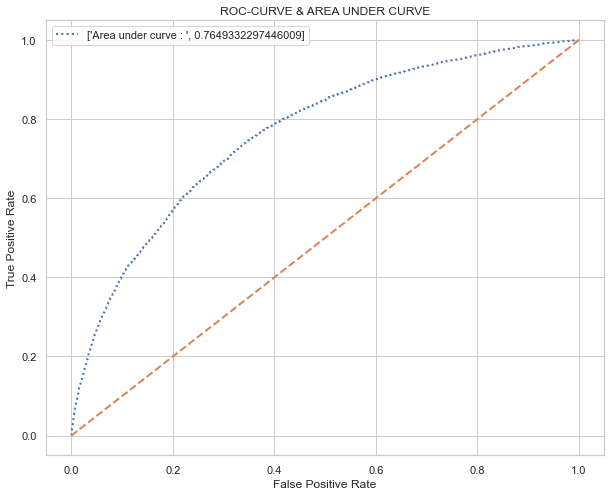

1:6: E211 whitespace before '('
2:6: E211 whitespace before '('
3:6: E211 whitespace before '('
4:6: E211 whitespace before '('
5:6: E211 whitespace before '('
6:1: W293 blank line contains whitespace
7:29: E231 missing whitespace after ','
8:3: E221 multiple spaces before operator
9:80: E501 line too long (92 > 79 characters)


In [59]:
print ("Accuracy score : ", accuracy)
print ("F1 score : ", f1_sc)
print ("Fbeta-7 score : ", f7)
print ("AUC : ", auc_score)
print ("classification report :\n", classify_metrics)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot(fpr, tpr, label=["Area under curve : ", auc_score], linewidth=2, linestyle="dotted")
ax.plot([0, 1], [0, 1], linewidth=2, linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [60]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

4:66: W291 trailing whitespace
6:1: W293 blank line contains whitespace
8:48: E251 unexpected spaces around keyword / parameter equals
8:50: E251 unexpected spaces around keyword / parameter equals
9:1: W293 blank line contains whitespace
14:23: E251 unexpected spaces around keyword / parameter equals
14:25: E251 unexpected spaces around keyword / parameter equals
16:1: W293 blank line contains whitespace
18:49: W291 trailing whitespace
19:50: W291 trailing whitespace
20:18: E251 unexpected spaces around keyword / parameter equals
20:20: E251 unexpected spaces around keyword / parameter equals
20:40: E251 unexpected spaces around keyword / parameter equals
20:42: E251 unexpected spaces around keyword / parameter equals
21:1: W293 blank line contains whitespace
25:1: W293 blank line contains whitespace
27:40: E702 multiple statements on one line (semicolon)
29:1: W293 blank line contains whitespace


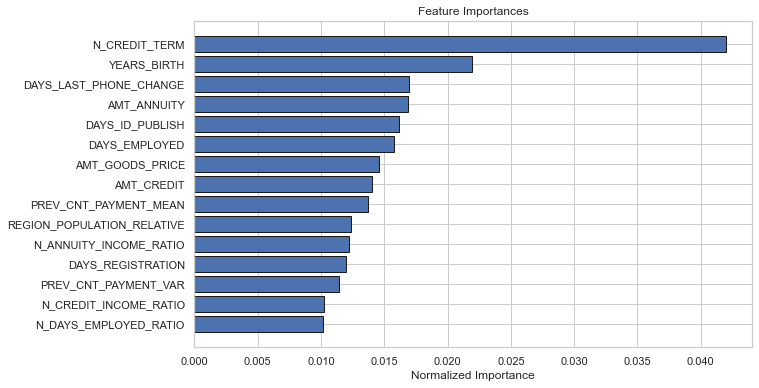

In [61]:
# Show the feature importances for the new features
feature_importances_sorted = plot_feature_importances(feature_importances)

## Optimization

Each classifier comes with its own set of hyperparameters, and those first rough results are worthless because default parameters may be wrong in our case.

### initialiaze search space

In [62]:
# Initializing the search space
space = {}

### preprocessing

here we could evaluate how preprocessing steps affect the results.

### models parameters

In [63]:
models_spaces = {}

In [157]:
naive.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [156]:
models_spaces['naive'] = {
    'model': GaussianNB
}

In [64]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [65]:
models_spaces['logreg'] = {
    'model': LogisticRegression,
    'C': hp.uniform('logreg_C', 0.0001, 2),
    'class_weight': hp.choice('logreg_class_weight', ['balanced', None]),
    'tol': hp.uniform('logreg_tol', 0.00001, 0.0001),
    'solver': hp.choice('logreg_solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'max_iter': hp.choice('logreg_max_iter', range(100, 1000)),
    # 'n_jobs': '-1'
} 

9:2: W291 trailing whitespace


In [66]:
rndfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
models_spaces['rndfor'] = {
    'model': RandomForestClassifier,
    'class_weight': hp.choice('rndfor_class_weight', ['balanced', None]),
    'max_depth': hp.choice('rndfor_max_depth', np.arange(1, 30, dtype=int)),
    'max_features': hp.choice('rndfor_max_features', range(1, 3)),
    'n_estimators': hp.choice('rndfor_n_estimators', np.arange(10, 800, 50, dtype=int)),
    'criterion': hp.choice('rndfor_criterion', ["gini", "entropy"]),
    # 'n_jobs': '-1'
}

6:80: E501 line too long (88 > 79 characters)


In [68]:
liggbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [69]:
models_spaces['liggbm'] = {
    'model': LGBMClassifier,
    'n_estimators': hp.choice('liggbm_n_estimators', np.arange(10, 810, 50, dtype=int)),
    'class_weight': hp.choice('liggbm_class_weight', ['balanced', None]),
    'max_depth': hp.choice('liggbm_max_depth', np.arange(1, 30, dtype=int)),
    'num_leaves': hp.choice('liggbm_num_leaves', np.arange(4, 101, 4, dtype=int)),
    # 'n_jobs': '-1'
}

3:80: E501 line too long (88 > 79 characters)
6:80: E501 line too long (82 > 79 characters)


In [70]:
# choice of a model into collection of models_spaces
space['models_spaces'] = hp.choice(
        'models_spaces',
        [models_spaces[key] for key in models_spaces]
    )

In [71]:
# Create the Tree Parzen Estimator algorithm
tpe_algorithm = tpe.suggest

### Initiate KFold

In [72]:
# initiate Kfold
kf = KFold(
    n_splits=3,
    shuffle=True,
    random_state=42,
)

skf = StratifiedKFold(n_splits=5)

### Objective function: FBeta (7)

In [169]:
# Define th objective function
def obj_fnc(params,
            X_opt=X_opt,
            y_opt=y_opt):
    # display the set of parameters currently evaluated
    print('current params:', params)
    # get all parameters, except the model
    parameters = params['models_spaces'].copy()
    del parameters['model']
    # create the classifier & its parameters
    clf = params['models_spaces']['model'](**parameters)
    # Perform n_folds cross validation
    start = timer()
    print('Cross-val predict in progress…')
    y_pred = cross_val_predict(
        clf,
        X_opt,
        y_opt,
        method='predict',
        cv=skf)
    # Compute score
    score = fbeta_score(y_opt, y_pred, beta=7)
    # return loss and status
    loss = 1 - score

    run_time = timer() - start
    # displays results
    print("Loss of the model:", loss)
    # evaluation dict
    dict_eval = {
        'loss': loss,
        'score': score,
        'run_time': run_time,
        'status': STATUS_OK,
    }
    return dict_eval

In [170]:
def run_trials():
    trials_step = 1  # nb add trials after loading (1: save after iteration)
    initial_evals = 1  # initial max_trials.
    try:  # try to load an already saved trials object, and increase the max
        hypopt_trials = pickle.load(open("hp_trials/trials.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(hypopt_trials.trials) + trials_step
        print("Rerunning from {} trials.".format(len(hypopt_trials.trials)))
    except:  # create a new trials object and start searching
        print("Unable to load previous trials...")
        hypopt_trials = Trials()
        max_evals = initial_evals
    # Optimisation accross the search space
    global best_params
    best_params = fmin(
        obj_fnc,
        space=space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=hypopt_trials
    )
    # save the trials object
    with open("hp_trials/trials.hyperopt", mode="wb") as f:
        pickle.dump(hypopt_trials, f)
    # get the best_params and save them
    best_params = space_eval(space, best_params)
    with open("hp_trials/best_params.hyperopt", mode="wb") as f:
        pickle.dump(best_params, f)
    # print the main results
    print(
        # "\nAlgo:", best_params['models_spaces']['model'],
        "\nBest loss:", hypopt_trials.best_trial['result']['loss'],
        # "\nPreprocessing:", best_params['preprocessing_steps'],
        # "\nModel params:", best_params['models_spaces'],
        "\n----------------------",
    )

9:5: E722 do not use bare 'except'


### Perform "hyperopt"

Here we launch a persistant search, keeping an eye on the Best loss evolution. For further use, a stop point could be implemented, for instance if Best loss does not change for a given number of iterations.

In [172]:
keep_going = True


def key_capture_thread():
    global keep_going
    # blocks until pressing 'Esc'.
    keyboard.wait('esc')
    keep_going = False
    print('\nINTERRUPTING… Please wait until shut down.')


def trials_loop():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    while keep_going:
        print("\nRUNNING... Press 'ESC' key to interrupt.")
        # launch hyperopt
        run_trials()
    print('\nINTERRUPTED!')


trials_loop()


RUNNING... Press 'ESC' key to interrupt.
Unable to load previous trials...
current params:                                                                                                        
{'models_spaces': {'C': 0.9344434156900799, 'class_weight': None, 'max_iter': 812, 'model': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'solver': 'liblinear', 'tol': 4.285474218948301e-05}}
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
0.9587572174869398                                                                                                     
100%|██████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.81s/trial, best loss: 0.9587572174869398]

Best loss: 0.9587572174869398 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! 

1.0                                                                                                                    
100%|██████████████████████████████████████████████████| 9/9 [00:05<00:00,  5.85s/trial, best loss: 0.7611264772441539]

Best loss: 0.7611264772441539 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 9 trials.
current params:                                                                                                        
{'models_spaces': {'class_weight': None, 'criterion': 'entropy', 'max_depth': 28, 'max_features': 2, 'model': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'n_estimators': 260}}
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
1.0                                                     

13:80: E501 line too long (97 > 79 characters)


## Best Model with FBeta Obj

### Get model params

In [85]:
# Load the best_params
best_params = pickle.load(open("hp_trials/best_params.hyperopt", "rb"))

# print current best_params
best_params

{'models_spaces': {'C': 1.5875034418661245,
  'class_weight': 'balanced',
  'max_iter': 545,
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'solver': 'liblinear',
  'tol': 1.8112939839851308e-05}}

In [86]:
def define_model(params):
    # Get the model from parameters
    model = params['models_spaces'].pop('model')

    # Instanciate model with best parameters
    model_instance = model(**params['models_spaces'])

    # Return instanciated model
    return model_instance

In [87]:
best_model = define_model(best_params)

In [88]:
fpr_best, tpr_best, auc_score_best, f7_best = model_run(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

LogisticRegression(C=1.5875034418661245, class_weight='balanced', max_iter=545,
                   solver='liblinear', tol=1.8112939839851308e-05)
AUC score:  0.6754
Fbeta score (7):  0.5472


# Overview of results

In [92]:
# Collect results
classifier_names = [
    'Gaussian Naive Bayes',
    'Logistic Regression',
    'LogReg_Best',
    'Random Forest',
    'LightGBM',
    'LightGBM_CV']
auc_scores = [
    auc_score_naive,
    auc_score_logreg,
    auc_score_best,
    auc_score_rndfor,
    auc_score_liggbm,
    auc_score]
f7_scores = [
    f7_naive,
    f7_logreg,
    f7_best,
    f7_rndfor,
    f7_liggbm,
    f7]

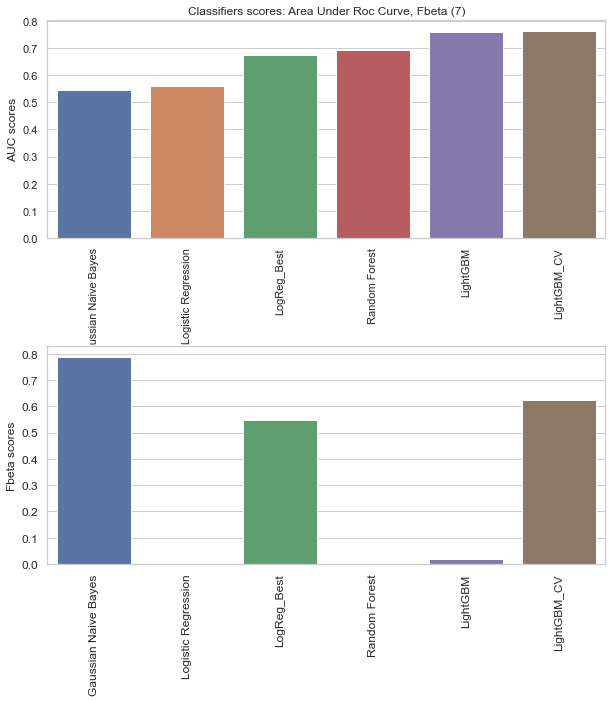

In [93]:
# display results
sns.set_color_codes("colorblind")
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Classifiers scores: Area Under Roc Curve, Fbeta (7)')
s1 = sns.barplot(x=classifier_names, y=auc_scores)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.ylabel('AUC scores', fontsize=12)
plt.subplot(212)
s2 = sns.barplot(x=classifier_names, y=f7_scores)
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
plt.ylabel('Fbeta scores', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0, 0.5, 'True Positive Rate')

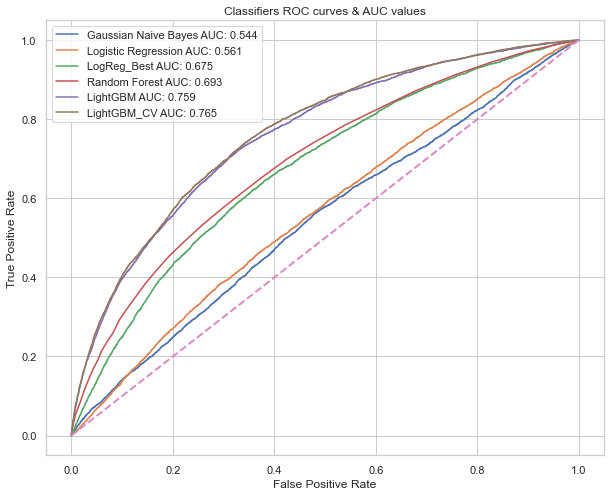

In [94]:
# display roc curves
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(
    fpr_naive,
    tpr_naive,
    label=str(classifier_names[0])
    + ' AUC: '
    + str(round(auc_score_naive, 3)))
ax.plot(
    fpr_logreg,
    tpr_logreg,
    label=str(classifier_names[1])
    + ' AUC: '
    + str(round(auc_score_logreg, 3)))
ax.plot(
    fpr_best,
    tpr_best,
    label=str(classifier_names[2])
    + ' AUC: '
    + str(round(auc_score_best, 3)))
ax.plot(
    fpr_rndfor,
    tpr_rndfor,
    label=str(classifier_names[3])
    + ' AUC: '
    + str(round(auc_score_rndfor, 3)))
ax.plot(
    fpr_liggbm,
    tpr_liggbm,
    label=str(classifier_names[4])
    + ' AUC: '
    + str(round(auc_score_liggbm, 3)))
ax.plot(
    fpr,
    tpr,
    label=str(classifier_names[5])
    + ' AUC: '
    + str(round(auc_score, 3)))

ax.plot([0, 1], [0, 1], linewidth=2, linestyle='--')
plt.legend(loc="best")
plt.title("Classifiers ROC curves & AUC values")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Scoring

### introduce threshold

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [95]:
# define a function to make threshold adjustable
def threshold_pred(model, X, threshold=0.1):
    pred = model.predict_proba(X)
    y_pred = pred[:, 1] > threshold
    return pred, y_pred.astype(int)

In [97]:
# get the predict_proba from a model
def get_predict_proba(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=None
):
    model.fit(X_train[cols], y_train)
    y_pred_proba = model.predict_proba(X_test[cols])[:, 1]
    return y_pred_proba

In [104]:
def fbeta_threshold(y_pred_proba, y_test, threshold=0.5):
    y_pred = y_pred_proba > threshold
    f7_th = fbeta_score(y_test, y_pred, beta=7)
    return f7_th

In [99]:
y_best_proba = get_predict_proba(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

In [123]:
y_model_proba = get_predict_proba(
    model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

In [122]:
model

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [105]:
f7_th_best = fbeta_threshold(y_best_proba, y_test)
print('Fbeta score (7), case best, threshold=0.5 : ', round(f7_th_best, 4))

Fbeta score (7), case best, threshold=0.5 :  0.5472


In [124]:
f7_th_cv = fbeta_threshold(y_model_proba, y_test)
print('Fbeta score (7), case best, threshold=0.5 : ', round(f7_th_cv, 4))

Fbeta score (7), case best, threshold=0.5 :  0.1639


This score is different from the score previously calculated, because model is fitted on any data. Leading to a disappointing F-Beta 7 results mean that score variability should be treated separately from genera model performance.

#### adjust threshold

In [106]:
scores = []
for i in np.linspace(0, 1, num=101):
    score = fbeta_threshold(y_best_proba, y_test, threshold=i)
    scores.append(score)

Max score: 0.8148802216342903
Optimal threshold: 0.05


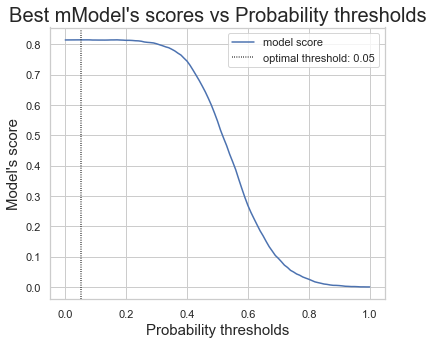

7:80: E501 line too long (109 > 79 characters)


In [125]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(np.linspace(0, 1, num=101), scores, label="model score")

max_score = max(scores)
opt_threshold = np.linspace(0, 1, num=101)[scores.index(max_score)]

plt.axvline(x=opt_threshold, color='k', dashes=(0.5, 1), label="optimal threshold: {}".format(opt_threshold))

plt.title("Best Model's scores vs Probability thresholds", fontsize=20)
plt.xlabel("Probability thresholds", fontsize=15)
plt.ylabel("Model's score", fontsize=15)
plt.legend()

print("Max score:", max_score)
print("Optimal threshold:", opt_threshold)

In [126]:
# same with cv model
scores_cv = []
for i in np.linspace(0, 1, num=101):
    score_cv = fbeta_threshold(y_model_proba, y_test, threshold=i)
    scores_cv.append(score_cv)

Max score: 0.8145032432485638
Optimal threshold: 0.0


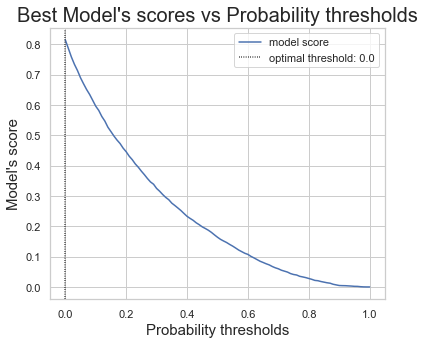

7:80: E501 line too long (109 > 79 characters)


In [127]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(np.linspace(0, 1, num=101), scores_cv, label="model score")

max_score = max(scores_cv)
opt_threshold = np.linspace(0, 1, num=101)[scores_cv.index(max_score)]

plt.axvline(x=opt_threshold, color='k', dashes=(0.5, 1), label="optimal threshold: {}".format(opt_threshold))

plt.title("Best Model's scores vs Probability thresholds", fontsize=20)
plt.xlabel("Probability thresholds", fontsize=15)
plt.ylabel("Model's score", fontsize=15)
plt.legend()

print("Max score:", max_score)
print("Optimal threshold:", opt_threshold)

In [135]:
# calculate pr-curve
precision_cv, recall_cv, thresholds_cv = precision_recall_curve(y_test, y_model_proba)

2:80: E501 line too long (86 > 79 characters)


In [136]:
fbeta7_score_cv = (1 + 49 * precision_cv * recall_cv) / (49 * precision_cv + recall_cv)

1:80: E501 line too long (87 > 79 characters)


In [137]:
# locate the index of the largest f score
ix = np.argmax(fbeta7_score_cv)

In [139]:
print('Opt cv Threshold=%f, F7-Score=%.3f' % (thresholds_cv[ix], fbeta7_score_cv[ix]))

Opt cv Threshold=0.984304, F7-Score=inf


1:80: E501 line too long (86 > 79 characters)


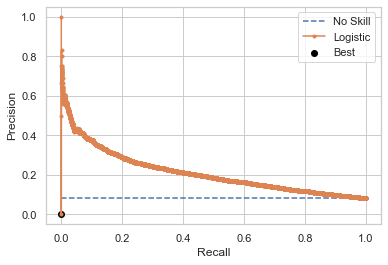

5:80: E501 line too long (85 > 79 characters)


In [140]:
# plot the roc curve for the model
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_cv, precision_cv, marker='.', label='Logistic')
plt.scatter(recall_cv[ix], precision_cv[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# Best model with AUC Score Obj

### Alternate Obj & trials functions

In [166]:
# Alternate objective function
def obj_fnc_auc(
    params,
    X_=X_opt,
    y_=y_opt
):

    # display the set of parameters currently evaluated
    print('current params:', params)
    # get all parameters, except the model
    parameters = params['models_spaces'].copy()
    del parameters['model']
    # create the classifier & its parameters
    clf = params['models_spaces']['model'](**parameters)
    # Perform n_folds cross validation
    start = timer()
    print('Cross-val predict in progress…')
    y_pred = cross_val_predict(
        clf,
        X_,
        y_,
        method='predict',
        cv=skf)
    # Compute score
    score = roc_auc_score(y_, y_pred)
    # return loss and status
    loss = 1 - score
    run_time = timer() - start
    # displays results
    print("Loss of the model:", loss)
    # evaluation dict
    dict_eval = {
        'loss': loss,
        'score': score,
        'run_time': run_time,
        'status': STATUS_OK,
    }
    return dict_eval

In [167]:
def run_trials_auc():
    trials_step = 1  # nb add trials after loading (1: save after iteration)
    initial_evals = 1  # initial max_trials.
    try:  # try to load an already saved trials object, and increase the max
        hypopt_trials = pickle.load(open("hp_trials/trials_auc.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(hypopt_trials.trials) + trials_step
        print("Rerunning from {} trials.".format(len(hypopt_trials.trials)))
    except:  # create a new trials object and start searching
        print("Unable to load previous trials...")
        hypopt_trials = Trials()
        max_evals = initial_evals
    # Optimisation accross the search space
    global best_params
    best_params = fmin(
        obj_fnc_auc,
        space=space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=hypopt_trials
    )
    # save the trials object
    with open("hp_trials/trials_auc.hyperopt", mode="wb") as f:
        pickle.dump(hypopt_trials, f)
    # get the best_params and save them
    best_params = space_eval(space, best_params)
    with open("hp_trials/best_params_auc.hyperopt", mode="wb") as f:
        pickle.dump(best_params, f)
    # print the main results
    print(
        # "\nAlgo:", best_params['models_spaces']['model'],
        "\nBest loss:", hypopt_trials.best_trial['result']['loss'],
        # "\nPreprocessing:", best_params['preprocessing_steps'],
        # "\nModel params:", best_params['models_spaces'],
        "\n----------------------",
    )

5:80: E501 line too long (80 > 79 characters)
9:5: E722 do not use bare 'except'


### Perform hyperopt

In [168]:
keep_going = True


def key_capture_thread():
    global keep_going
    # blocks until pressing 'Esc'.
    keyboard.wait('esc')
    keep_going = False
    print('\nINTERRUPTING… Please wait until shut down.')


def trials_loop():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    while keep_going:
        print("\nRUNNING... Press 'ESC' key to interrupt.")
        # launch hyperopt
        run_trials_auc()
    print('\nINTERRUPTED!')


trials_loop()


RUNNING... Press 'ESC' key to interrupt.
Unable to load previous trials...
current params:                                                                                                        
{'models_spaces': {'C': 0.37680579370860134, 'class_weight': None, 'max_iter': 716, 'model': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'solver': 'newton-cg', 'tol': 3.4722039670891325e-05}}
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
0.5080847586247155                                                                                                     
100%|██████████████████████████████████████████████████| 1/1 [00:48<00:00, 48.27s/trial, best loss: 0.5080847586247155]

Best loss: 0.5080847586247155 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials

0.5                                                                                                                    
100%|█████████████████████████████████████████████████| 9/9 [00:01<00:00,  1.97s/trial, best loss: 0.49306812211779816]

Best loss: 0.49306812211779816 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 9 trials.
current params:                                                                                                        
{'models_spaces': {'class_weight': 'balanced', 'max_depth': 28, 'model': <class 'lightgbm.sklearn.LGBMClassifier'>, 'n_estimators': 10, 'num_leaves': 8}}
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
0.5196281594769716                                                                          

Cross-val predict in progress…                                                                                         
                                                                                                                       
INTERRUPTING… Please wait until shut down.
Loss of the model:                                                                                                     
0.5075448018212597                                                                                                     
100%|███████████████████████████████████████████████| 18/18 [00:47<00:00, 47.30s/trial, best loss: 0.49306812211779816]

Best loss: 0.49306812211779816 
----------------------

INTERRUPTED!


13:80: E501 line too long (97 > 79 characters)


### Digging deeper into classification matrix

In [ ]:
log_reg.fit(X_train, y_train)
pred, y_pred = threshold_pred(log_reg_weight, X_test, threshold=0.5)

In [ ]:
plt.xlabel('Probabilities')
plt.ylabel('Count')
plt.hist(pred[:, 0], bins=100)
plt.hist(pred[:, 1], bins=100)
plt.show()

first, we need to avoid __False Negative__ : approval of any clients with actual defaults is our worts case, predicting target 0 while actual value is 1.
then, we also wish to avoid __False Positive__ : rejecting too many clients who actually would not fail, predicting target 1 while actual value is 0.

In [ ]:
# get any case of the confusion matrix
# ravel() is equivalent to flatten for arrays
(tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
(ttn, tfp, tfn, ttp) = confusion_matrix(y_test, y_pred).ravel() / len(y_test)

In [ ]:
(tn, fp, fn, tp)

In [ ]:
(ttn, tfp, tfn, ttp) 

In [ ]:
pred_nom = log_reg.predict(X_test)
(ntn, nfp, nfn, ntp) = confusion_matrix(y_test, pred_nom).ravel()
(ntn, nfp, nfn, ntp)

In [ ]:
# get the precision, recall
precision, recall, f_thresholds = precision_recall_curve(y_test, pred[:, 1])

In [ ]:
print(np.count_nonzero(y_test))
print(len(y_test))

In [ ]:
# optimal threshold
list_tn = []
list_fp = []
list_fn = []
list_tp = []
list_prec = []
list_rec = []
list_fscore = []
list_gain = []
list_custom = []
threshold_values = []

tp_coef = 0
tn_coef = 1
fn_coef = -7
fp_coef = -1

worst_case = fp_coef * np.count_nonzero(y_test) + tn_coef * (len(y_test) - np.count_nonzero(y_test))
best_case = tn_coef * (len(y_test) - np.count_nonzero(y_test))


for i in np.arange(0, 1, 0.01):
    _, temp_y_pred = threshold_pred(log_reg_weight, X_test, threshold=i)
    tn, fp, fn, tp = confusion_matrix(y_test, temp_y_pred).ravel()
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    fscore = 2 * prec * rec / (prec + rec)
    gain = tp * tp_coef + tn * tn_coef + fn * fn_coef + fp * fp_coef
    custom = (gain - worst_case) / (best_case - worst_case)
    threshold_values.append(i)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)
    list_prec.append(prec)
    list_rec.append(rec)
    list_fscore.append(fscore)
    list_gain.append(gain)
    list_custom.append(custom)

In [ ]:
confusion_matrix_df = pd.DataFrame({'tn': list_tn,
                                    'fp': list_fp,
                                    'fn': list_fn,
                                    'tp': list_tp},
                                   index=threshold_values)

In [ ]:
confusion_matrix_df.sample(10)

In [ ]:
scores_df = pd.DataFrame({'precision': list_prec,
                          'recall': list_rec,
                          'f1score': list_fscore,
                          'gain': list_gain,
                          'custom': list_custom},
                         index=threshold_values)

In [ ]:
scores_df.sample(10)

In [ ]:
scores_df['gain'].plot()

In [ ]:
rates = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn', 'tp', 'tn']]

In [ ]:
tot_rate = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']].sum(axis=1)

In [ ]:
# precision = precision_recall_df['precision']

In [ ]:
fig, ax = plt.subplots()
pal = ['#fbb4ae', '#e41a1c', '#cccccc', '#b3e2cd']
rates.plot(kind='area', stacked=True, ax=ax, color=pal)
tot_rate.plot(ax=ax, color='black', label='%tot_rate')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

We have to find the right balance (cost) between both case to catch an optimal threshold : fn is n times worst than fp. as it primarily depends on the famous {X, Y} parameters, leading to a damage we have no clue to compute, we don't know real value of n. <br/>
n would surely be different for revolving or high amount credits. <br/>
let's start with 7, just to see the resulting shape of a damage value.

In [ ]:
damage_df = pd.DataFrame({'fp damages : unit': confusion_matrix_df['fp'],
                          'fn damages : 7x unit': 7 * confusion_matrix_df['fn']})

In [ ]:
damages = (damage_df/damage_df.sum(axis=1).max())

In [ ]:
tot_damage = (damage_df.sum(axis=1)/damage_df.sum(axis=1).max())

In [ ]:
np.argmin(tot_damage)

In [ ]:
scores_df.head(3)

In [ ]:
fig, ax = plt.subplots()
damages.plot(kind='area', stacked=True, ax=ax, color=pal)
tot_damage.plot(ax=ax, color="black", label="%tot_rate")
# scores_df['precision'].plot(ax=ax, color='green', label='%precision')
# scores_df['recall'].plot(ax=ax, color='red', label='%recall')
scores_df['f1score'].plot(ax=ax, color='green', label='%f1score')
plt.axvline(x=0.57, color='k', linestyle='--')
# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 1)
ax.legend()
plt.show()

In [ ]:
# print(precision_recall_df['f1score'].idxmax())
# print(precision_recall_df.loc[precision_recall_df['f1score'].idxmax(), 'f1score'])

In [ ]:
# refine optimal threshold

list_tn = []
list_fp = []
list_fn = []
list_tp = []
threshold_values =[]

for i in np.arange(0,0.2,0.01) :
    temp_y_pred = threshold_pred(random_forest, X_test, threshold=i)
    tn, fp, fn, tp = confusion_matrix(y_test, temp_y_pred).ravel()
    print(tn, fp, fn, tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)
    threshold_values.append(i)

In [ ]:
adj_confusion_matrix_df = pd.DataFrame({'tn' : list_tn,
                                        'fp' : list_fp,
                                        'fn' : list_fn,
                                        'tp' : list_tp},
                                        index=threshold_values) 

In [ ]:
adj_rates = adj_confusion_matrix_df.divide(adj_confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']]
adj_tot_rate = adj_confusion_matrix_df.divide(adj_confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']].sum(axis=1)

In [ ]:
fig, ax = plt.subplots()
adj_rates.plot(kind='area', stacked=True, ax=ax)
adj_tot_rate.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

In [ ]:
adj_damage_df = pd.DataFrame({'fp damages : unit' : adj_confusion_matrix_df['fp'],
                              'fn damages : 7x unit' : 7 * adj_confusion_matrix_df['fn']})

adj_damages = (adj_damage_df/adj_damage_df.sum(axis=1).max())

adj_tot_damage = (adj_damage_df.sum(axis=1)/adj_damage_df.sum(axis=1).max())

In [ ]:
fig, ax = plt.subplots()
adj_damages.plot(kind='area', stacked=True, ax=ax)
adj_tot_damage.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

In [ ]:
# optimal threshold
adj_damage_df.sum(axis=1).idxmin()

## Train & predict

In [ ]:
def my_prep(data=train,
            impute_strategy='median',
            scale_strategy=False):
    '''function that split data into train and test according to split_size (test)
    and impute missing values according to the impute strategy
    and MinMaxScale features'''
    # drop the target from the training data
    if 'TARGET' in data:
        X_ = data.drop(columns=['TARGET'])
        y_ = data['TARGET']
    else:
        X_ = data.copy()
        y_ = []
    # to keep df format : store columns & index
    columns = X_.columns
    index = X_.index
    # imputation of missing values
    imputer = SimpleImputer(
        missing_values=np.nan,
        strategy=impute_strategy)
    imputer.fit(X_)
    X_ = pd.DataFrame(
        imputer.fit_transform(X_),
        columns=columns,
        index=index)
    # Scale if True, each feature to 0-1
    if scale_strategy is True:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(X_)
        X_ = pd.DataFrame(
            scaler.fit_transform(X_),
            columns=columns,
            index=index)
    return X_, y_, columns

In [ ]:
X_train, y_train, features = my_prep()

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
X_test, _, features = my_prep(data=test)

In [ ]:
X_test.head()

In [ ]:
y_test = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
final = X_test.copy()
final['RISK_FLAG'] = y_test

In [ ]:
final['RISK_PROBA'] = y_proba

In [ ]:
# csv for interpretation
final.to_csv('Data/final.csv')

# to be removed : old stuff - from here -

In [ ]:
STOP

### raw prediction

In [ ]:
log_reg.fit(X_train, y_train)
results = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

In [ ]:
(tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
(tn, fp, fn, tp)

In [ ]:
show_results(log_reg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, case='raw log reg')

### raw with class weight

In [ ]:
# Make the model with the specified regularization parameter
log_reg_weight = LogisticRegression(class_weight='balanced', C=0.0001)

In [ ]:
show_results(log_reg_weight, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, case='weighted class log reg')

## SMOTE

In [ ]:
sm = SMOTE(random_state=7)

In [ ]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
show_results(log_reg, X_train=X_train_new, X_test=X_test, y_train=y_train_new, y_test=y_test, case='log reg smote')

__Logistic Regression with Basic FE and Application df only score around AUC 0.69__

## Random Forest

To try and beat the poor performance of our baseline, we can update the algorithm. Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [ ]:
show_results(random_forest, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, case='random forest')

In [ ]:
# Make the random forest classifier
random_forest_weight = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=50,
    verbose=1,
    n_jobs=-1)

In [ ]:
show_results(
    random_forest_weight,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    case='weighted class random forest')

In [ ]:
show_results(random_forest,
             X_train=X_train_new,
             X_test=X_test,
             y_train=y_train_new,
             y_test=y_test,
             case='random forest smote')

In [ ]:
random_forest.fit(X_train, y_train)
y_pred_1 = random_forest.predict_proba(X_test)[:,1]
fpr1 , tpr1, thr1 = roc_curve(y_test, y_pred_1)
random_forest_weight.fit(X_train, y_train)
y_pred_2 = random_forest_weight.predict_proba(X_test)[:,1]
fpr2 , tpr2, thr2 = roc_curve(y_test, y_pred_2)
random_forest.fit(X_train_new, y_train_new)
y_pred_3 = random_forest.predict_proba(X_test)[:,1]
fpr3 , tpr3, thr3 = roc_curve(y_test, y_pred_3)
log_reg.fit(X_train, y_train)
y_pred_4 = log_reg.predict_proba(X_test)[:,1]
fpr4 , tpr4, thr4 = roc_curve(y_test, y_pred_4)
log_reg_weight.fit(X_train, y_train)
y_pred_5 = log_reg_weight.predict_proba(X_test)[:,1]
fpr5 , tpr5, thr5 = roc_curve(y_test, y_pred_5)
log_reg.fit(X_train_new, y_train_new)
y_pred_6 = log_reg.predict_proba(X_test)[:,1]
fpr6 , tpr6, thr6 = roc_curve(y_test, y_pred_6)


In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label="rf")
plt.plot(fpr2, tpr2, label="rf_weight")
plt.plot(fpr3, tpr3, label="rf_smote")
plt.plot(fpr4, tpr4, label="lr")
plt.plot(fpr5, tpr5, label="lr_weight")
plt.plot(fpr6, tpr6, label="lr_smote")
plt.legend()
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
thr6

## Features importance

In [ ]:
# Train on the training data
random_forest_weight.fit(X_train, y_train)

In [ ]:
# Extract feature importances
feature_importance_values = random_forest_weight.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
feature_importances

#### Same with class_weight

In [ ]:
random_forest_weight.predict_proba(X_test)[:, 1]

In [ ]:
# optimal threshold

list_tn = []
list_fp = []
list_fn = []
list_tp = []
threshold_values =[]

for i in np.arange(0,1,0.05) :
    temp_y_pred = threshold_pred(random_forest_weight, X_test, threshold=i)
    tn, fp, fn, tp = confusion_matrix(y_test, temp_y_pred).ravel()
    print(tn, fp, fn, tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)
    threshold_values.append(i)

In [ ]:
confusion_matrix_df = pd.DataFrame({'tn' : list_tn,
                                    'fp' : list_fp,
                                    'fn' : list_fn,
                                    'tp' : list_tp},
                                   index=threshold_values)

In [ ]:
rates = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']]

In [ ]:
tot_rate = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']].sum(axis=1)

In [ ]:
fig, ax = plt.subplots()
rates.plot(kind='area', stacked=True, ax=ax)
tot_rate.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

We have to find the right balance (cost) between both case to catch an optimal threshold : fn is n times worst than fp. as it primarily depends on the famous {X, Y} parameters, leading to a damage we have no clue to compute, we don't know real value of n. <br/>
n would surely be different for revolving or high amount credits. <br/>
let's start with 7, just to see the resulting shape of a damage value.

In [ ]:
damage_df = pd.DataFrame({'fp damages : unit' : confusion_matrix_df['fp'],
                          'fn damages : 7x unit' : 7 * confusion_matrix_df['fn']})

In [ ]:
damages = (damage_df/damage_df.sum(axis=1).max())

In [ ]:
tot_damage = (damage_df.sum(axis=1)/damage_df.sum(axis=1).max())

In [ ]:
fig, ax = plt.subplots()
damages.plot(kind='area', stacked=True, ax=ax)
tot_damage.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

#### Testing Domain Features

Now we can test the domain features we made by hand.

In [ ]:
# same with so called "domain" features
if 'TARGET' in app_train:
    X_domain = app_train_domain.drop(columns = ['TARGET'])
else:
    X_domain = app_train_domain.copy()
y_domain = app_train_domain['TARGET']
    
# Feature names
domain_features_names = list(X_domain.columns)


# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit-transform training dataset
X_domain = imputer.fit_transform(X_domain)

# Repeat with the scaler
X_domain = scaler.fit_transform(X_domain)

# Split data into train and test set (stratify by target)
X_dom_train, X_dom_test, y_dom_train, y_dom_test = train_test_split(X_domain, y_domain, stratify=y_domain, test_size=0.3, random_state=42)


print('Training data shape: ', X_dom_train.shape)
print('Testing data shape: ', X_dom_test.shape)

print('Labels train data shape: ', y_dom_train.shape)
print('Labels test data shape: ', y_dom_test.shape)

In [ ]:
# Make the random forest classifier
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest_domain.fit(X_dom_train, y_dom_train)

# Extract feature importances
feature_importance_domain_values = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_domain_values})

# Make predictions on the test data
ran_for_dom_pred = random_forest_domain.predict_proba(X_dom_test)[:, 1]

__Random Forest with Basic FE and Application df only score around AUC 0.71__

#### Testing transparency 

Now we can test the removal of ext_ features as well as SK ID

In [ ]:
# same with so called "domain" features
app_transp = app_train_domain.drop(columns = ['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])


if 'TARGET' in app_train:
    X_transp = app_transp.drop(columns = ['TARGET'])
else:
    X_transp = app_transp.copy()
y_transp = app_transp['TARGET']
    
# Feature names
transp_features_names = list(X_transp.columns)


# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit-transform training dataset
X_transp = imputer.fit_transform(X_transp)

# Repeat with the scaler
X_transp = scaler.fit_transform(X_transp)

# Split data into train and test set (stratify by target)
X_transp_train, X_transp_test, y_transp_train, y_transp_test = train_test_split(X_transp, y_transp, stratify=y_transp, test_size=0.3, random_state=42)


print('Training data shape: ', X_transp_train.shape)
print('Testing data shape: ', X_transp_test.shape)

print('Labels train data shape: ', y_transp_train.shape)
print('Labels test data shape: ', y_transp_test.shape)

In [ ]:
# Make the random forest classifier
random_forest_transp = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest_transp.fit(X_transp_train, y_transp_train)

# Extract feature importances
feature_importance_transp_values = random_forest_transp.feature_importances_
feature_importances_transp = pd.DataFrame({'feature': transp_features_names, 'importance': feature_importance_transp_values})

# Make predictions on the test data
ran_for_transp_pred = random_forest_transp.predict_proba(X_transp_test)[:, 1]

In [ ]:
auc_scor = roc_auc_score(y_transp_test, ran_for_transp_pred)
print("AUC score: ", auc_scor)

print("Confusion matrix: ")
print(confusion_matrix(y_transp_test, ran_for_dom_pred.round(), normalize=None))

print("Accuracy score: ", accuracy_score(y_transp_test, ran_for_dom_pred.round()))
print("Recall score: ", recall_score(y_transp_test, ran_for_dom_pred.round()))
print("F1-score: ", f1_score(y_transp_test, ran_for_dom_pred.round()))

__Random Forest for transparency ! with Basic FE and Application df only score around AUC 0.65__

## Model Interpretation: Feature Importances

As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the `EXT_SOURCE` and the `DAYS_BIRTH`. We may use these feature importances as a method of dimensionality reduction in future work.

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 12))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['importance_normalized'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['feature'].head(30))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

As expected, the most important features are those dealing with `EXT_SOURCE` and `DAYS_BIRTH`. We see that there are only a handful of features with a significant importance to the model, which suggests we may be able to drop many of the features without a decrease in performance (and we may even see an increase in performance.) Feature importances are not the most sophisticated method to interpret a model or perform dimensionality reduction, but they let us start to understand what factors our model takes into account when it makes predictions. 

In [ ]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

We see that all four of our hand-engineered features made it into the top 15 most important! This should give us confidence that our domain knowledge was at least partially on track.

In [ ]:
feature_importances_transp_sorted = plot_feature_importances(feature_importances_transp)

# Just for Fun: Light Gradient Boosting Machine

Now (if you want, this part is entirely optional) we can step off the deep end and use a real machine learning model: the [gradient boosting machine](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) using the [LightGBM library](http://lightgbm.readthedocs.io/en/latest/Quick-Start.html)! The Gradient Boosting Machine is currently the leading model for learning on structured datasets (especially on Kaggle) and we will probably need some form of this model to do well in the competition. Don't worry, even if this code looks intimidating, it's just a series of small steps that build up to a complete model. I added this code just to show what may be in store for this project, and because it gets us a slightly better score on the leaderboard. In future notebooks we will see how to work with more advanced models (which mostly means adapting existing code to make it work better), feature engineering, and feature selection. See you in the next notebook!  

In [ ]:
import lightgbm as lgb


def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics